# 1. What is Confusion Matrix and why you need it?

Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

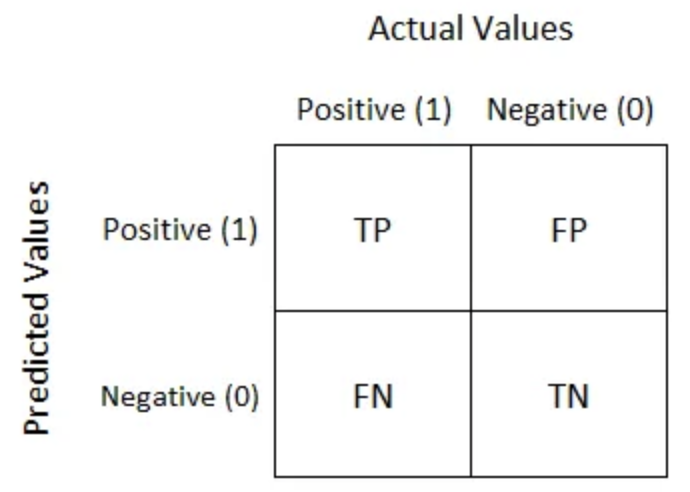

It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.

#### True Positive:

1. Interpretation: You predicted positive and it’s true.
2. You predicted that a woman is pregnant and she actually is.

#### False Positive: (Type 1 Error)

1. Interpretation: You predicted positive and it’s false.
2. You predicted that a woman is pregnant but he actually is not.

#### True Negative:

1. Interpretation: You predicted negative and it’s true.
2. You predicted that a woman is not pregnant and he actually is not.

#### False Negative: (Type 2 Error)

1. Interpretation: You predicted negative and it’s false.
2. You predicted that a woman is not pregnant but she actually is.

### 2. Recall

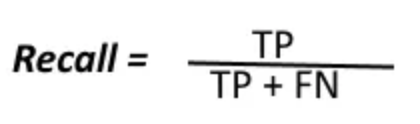

1. The above equation can be explained by saying, from all the positive classes, how many we predicted correctly.
2. Recall should be high as possible.

### 3. Precision

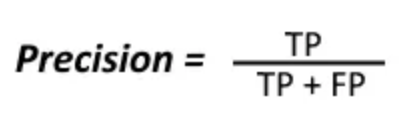

1. The above equation can be explained by saying, from all the classes we have predicted as positive, how many are actually positive.
2. Precision should be high as possible.

### 4. Accuracy

1. From all the classes (positive and negative), how many of them we have predicted correctly.
2. Accuracy should be high as possible.

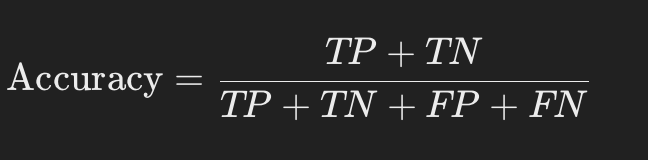

### 5. F-measure 

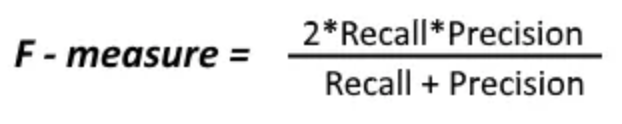

It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

### 6. False Positive Rate

The proportion of actual negatives that are incorrectly identified as positives.

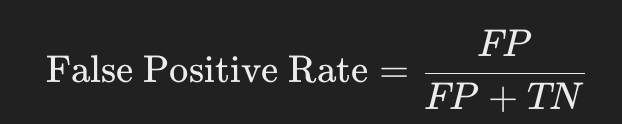

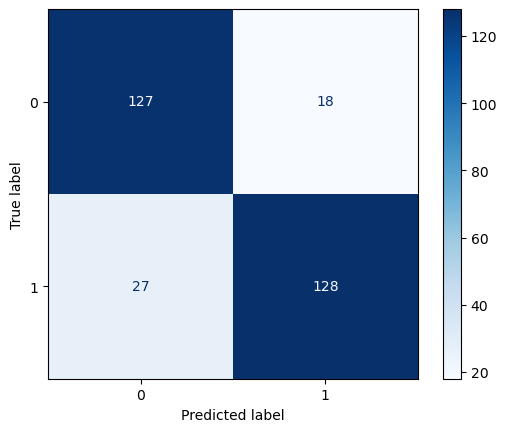

Accuracy: 0.85
Precision: 0.88
Recall: 0.83
Specificity: 0.88
F1 Score: 0.85


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate and print performance metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'F1 Score: {f1_score:.2f}')
